In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#### Allows for scrolling through data
pd.set_option("display.max_rows", None)

In [3]:
kills = pd.read_csv("../data/vct_2023/matches/kills.csv")
all_kills = kills.loc[kills['Kill Type'] == 'All Kills']
all_kills_all_maps = kills.loc[(kills['Kill Type'] == 'All Kills') & (kills['Map'] == 'All Maps')]
all_kills_all_maps.reset_index(drop = True, inplace = True)
all_kills_all_maps.head()

Tournament        Stage   Match Type  \
0  Valorant Champions 2023  Group Stage  Opening (D)   
1  Valorant Champions 2023  Group Stage  Opening (D)   
2  Valorant Champions 2023  Group Stage  Opening (D)   
3  Valorant Champions 2023  Group Stage  Opening (D)   
4  Valorant Champions 2023  Group Stage  Opening (D)   

                     Match Name       Map  Player Team  Player     Enemy Team  \
0  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
1  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
2  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
3  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
4  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   

      Enemy  Player Kills  Enemy Kills  Difference  Kill Type  
0     ANGE1           9.0         12.0        -3.0  All Kills  
1  SUYGETSU           6.0         10.0        -4.0  All Kills  
2    Zyppan           8.0          7.0         1.0  All Kills  
3      cNed           7.0          5.0         2.0  All Kills  
4      Shao           8.0          4.0         4.0  All Kills

In [4]:
scores = pd.read_csv("../data/vct_2023/matches/scores.csv")
scores.head()

Tournament        Stage    Match Type  \
0  Valorant Champions 2023  Group Stage   Opening (D)   
1  Valorant Champions 2023  Group Stage   Opening (D)   
2  Valorant Champions 2023  Group Stage   Opening (B)   
3  Valorant Champions 2023  Group Stage   Opening (B)   
4  Valorant Champions 2023  Group Stage  Winner's (D)   

                         Match Name         Team A           Team B  \
0      Team Liquid vs Natus Vincere    Team Liquid    Natus Vincere   
1                       DRX vs LOUD            DRX             LOUD   
2                 FUT Esports vs T1    FUT Esports               T1   
3  Evil Geniuses vs FunPlus Phoenix  Evil Geniuses  FunPlus Phoenix   
4              Natus Vincere vs DRX  Natus Vincere              DRX   

   Team A Score  Team B Score       Match Result  
0             0             2  Natus Vincere won  
1             2             1            DRX won  
2             2             0    FUT Esports won  
3             2             0  Evil Geniuses won  
4             1             2            DRX won

In [26]:
# match_indices = [i for i in range(len(scores['Match Name'])) if i not in [j for j in range(93,111)] and i not in [290]]
# scores_new = scores.iloc[match_indices]

In [27]:
# scores_new.reset_index(drop=True, inplace=True)
# scores_new.head()

In [28]:
# def removeWon(s):
#     return s[:-4]

# new_results_column = scores_new['Match Result'].apply(removeWon)
# scores_new.loc[:,'Match Result'] = new_results_column

In [29]:
# team_a_won = (scores_new['Match Result'] == scores_new['Team A'])
# team_a_won = team_a_won.apply(int)

In [30]:
# all_kills_all_maps['Won'] = np.repeat(list(team_a_won),25)

In [31]:
# all_kills_all_maps.head()

Doing this with merge instead.

In [18]:
left = all_kills_all_maps
right = scores[["Tournament", "Stage", "Match Type", "Match Name", "Match Result"]]
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name']
kills_vs_outcome = left.merge(right, left_on=keys, right_on=keys)
kills_vs_outcome['KDR'] = kills_vs_outcome['Player Kills']/kills_vs_outcome['Enemy Kills']
kills_vs_outcome.head() 

Tournament        Stage   Match Type  \
0  Valorant Champions 2023  Group Stage  Opening (D)   
1  Valorant Champions 2023  Group Stage  Opening (D)   
2  Valorant Champions 2023  Group Stage  Opening (D)   
3  Valorant Champions 2023  Group Stage  Opening (D)   
4  Valorant Champions 2023  Group Stage  Opening (D)   

                     Match Name       Map  Player Team  Player     Enemy Team  \
0  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
1  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
2  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
3  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   
4  Team Liquid vs Natus Vincere  All Maps  Team Liquid  Jamppi  Natus Vincere   

      Enemy  Player Kills  Enemy Kills  Difference  Kill Type  \
0     ANGE1           9.0         12.0        -3.0  All Kills   
1  SUYGETSU           6.0         10.0        -4.0  All Kills   
2    Zyppan           8.0          7.0         1.0  All Kills   
3      cNed           7.0          5.0         2.0  All Kills   
4      Shao           8.0          4.0         4.0  All Kills   

        Match Result       KDR  
0  Natus Vincere won  0.750000  
1  Natus Vincere won  0.600000  
2  Natus Vincere won  1.142857  
3  Natus Vincere won  1.400000  
4  Natus Vincere won  2.000000

In [19]:
def removeWon(s):
    return s[:-4]
kills_vs_outcome['Won'] = (kills_vs_outcome['Player Team'] == kills_vs_outcome['Match Result'].apply(removeWon)).apply(lambda x: 'Won' if x else 'Lost')

In [20]:
kills_vs_outcome

Tournament              Stage  \
0                               Valorant Champions 2023        Group Stage   
1                               Valorant Champions 2023        Group Stage   
2                               Valorant Champions 2023        Group Stage   
3                               Valorant Champions 2023        Group Stage   
4                               Valorant Champions 2023        Group Stage   
5                               Valorant Champions 2023        Group Stage   
6                               Valorant Champions 2023        Group Stage   
7                               Valorant Champions 2023        Group Stage   
8                               Valorant Champions 2023        Group Stage   
9                               Valorant Champions 2023        Group Stage   
10                              Valorant Champions 2023        Group Stage   
11                              Valorant Champions 2023        Group Stage   
12                              Valorant Champions 2023        Group Stage   
13                              Valorant Champions 2023        Group Stage   
14                              Valorant Champions 2023        Group Stage   
15                              Valorant Champions 2023        Group Stage   
16                              Valorant Champions 2023        Group Stage   
17                              Valorant Champions 2023        Group Stage   
18                              Valorant Champions 2023        Group Stage   
19                              Valorant Champions 2023        Group Stage   
20                              Valorant Champions 2023        Group Stage   
21                              Valorant Champions 2023        Group Stage   
22                              Valorant Champions 2023        Group Stage   
23                              Valorant Champions 2023        Group Stage   
24                              Valorant Champions 2023        Group Stage   
25                              Valorant Champions 2023        Group Stage   
26                              Valorant Champions 2023        Group Stage   
27                              Valorant Champions 2023        Group Stage   
28                              Valorant Champions 2023        Group Stage   
29                              Valorant Champions 2023        Group Stage   
30                              Valorant Champions 2023        Group Stage   
31                              Valorant Champions 2023        Group Stage   
32                              Valorant Champions 2023        Group Stage   
33                              Valorant Champions 2023        Group Stage   
34                              Valorant Champions 2023        Group Stage   
35                              Valorant Champions 2023        Group Stage   
36                              Valorant Champions 2023        Group Stage   
37                              Valorant Champions 2023        Group Stage   
38                              Valorant Champions 2023        Group Stage   
39                              Valorant Champions 2023        Group Stage   
40                              Valorant Champions 2023        Group Stage   
41                              Valorant Champions 2023        Group Stage   
42                              Valorant Champions 2023        Group Stage   
43                              Valorant Champions 2023        Group Stage   
44                              Valorant Champions 2023        Group Stage   
45                              Valorant Champions 2023        Group Stage   
46                              Valorant Champions 2023        Group Stage   
47                              Valorant Champions 2023        Group Stage   
48                              Valorant Champions 2023        Group Stage   
49                              Valorant Champions 2023        Group Stage   
50                              Valorant Champions 2023        Grou

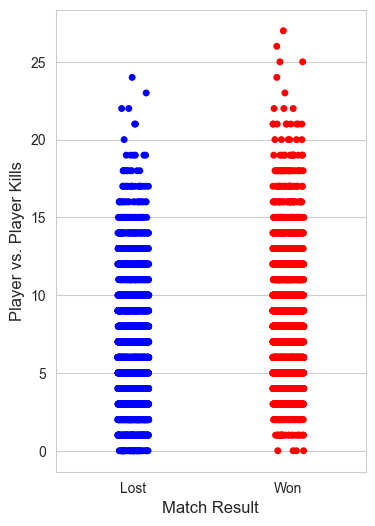

In [21]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills", fontsize=12)

plt.show()

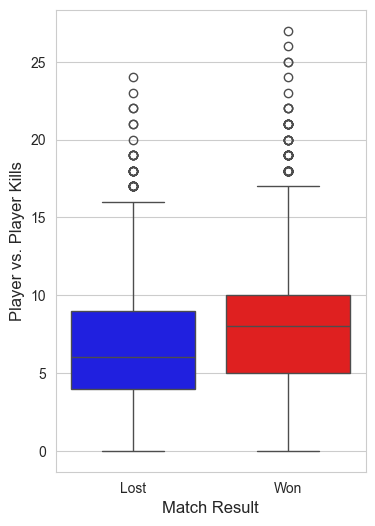

In [22]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills", fontsize=12)

plt.show()

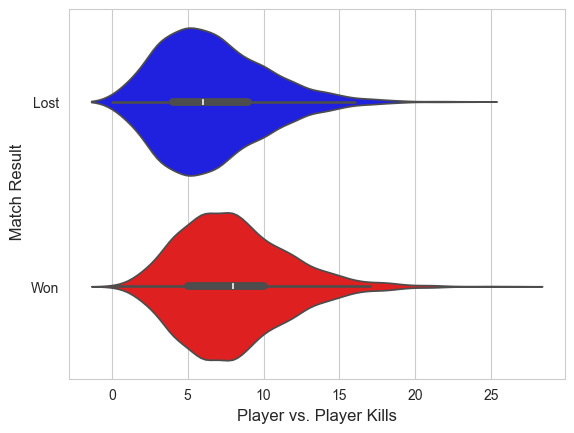

In [23]:
plt.figure()

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)


plt.xlabel("Player vs. Player Kills", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

Kill differences on 1v1 basis.

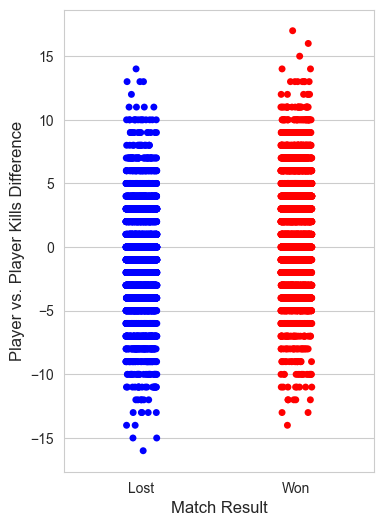

In [24]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills Difference", fontsize=12)

plt.show()


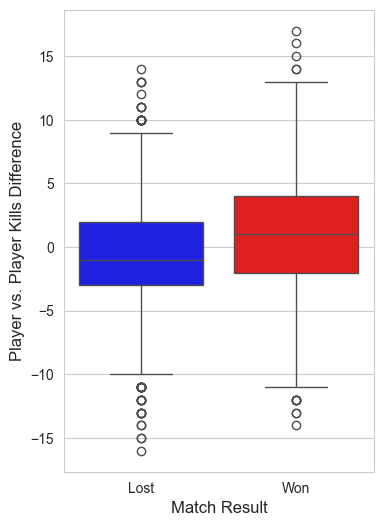

In [25]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills Difference", fontsize=12)

plt.show()

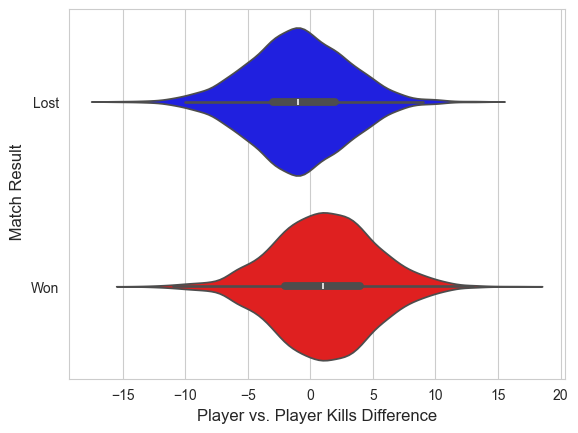

In [26]:
plt.figure()

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)


plt.xlabel("Player vs. Player Kills Difference", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

1v1 KDR and Match outcomes

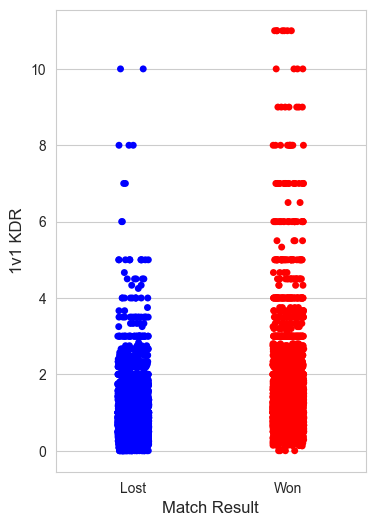

In [27]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'KDR',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("1v1 KDR", fontsize=12)

plt.show()

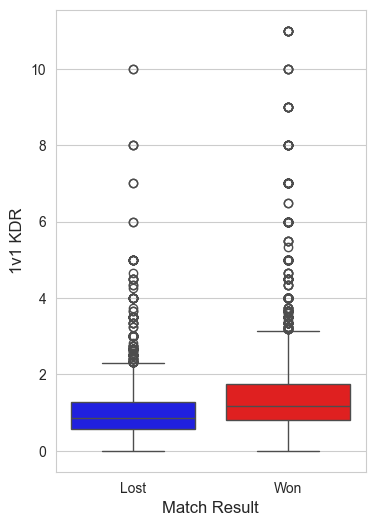

In [28]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'KDR',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("1v1 KDR", fontsize=12)

plt.show()

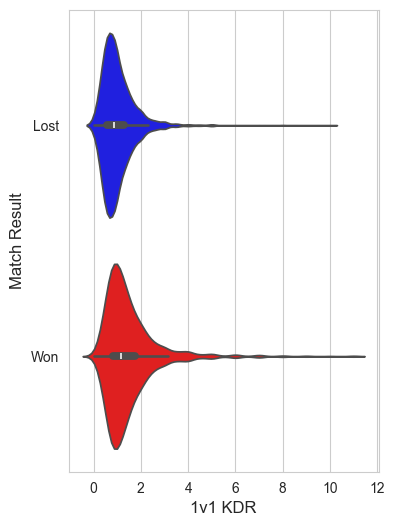

In [31]:
plt.figure(figsize=(4,6))

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'KDR',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Match Result", fontsize=12)
plt.xlabel("1v1 KDR", fontsize=12)

plt.show()